In [93]:
import os
import numpy as np
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression

import yfinance as yf
import matplotlib.pyplot as plt

# Constructing the Dataset

In [98]:
spy_list = ['SPY', 'MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'AAP', 
 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 
 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 
 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 
 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 
 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B', 
 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 
 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 
 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 
 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 
 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 
 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 
 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 
 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 
 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 
 'ESS', 'EL', 'ETSY', 'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'META', 
 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FRC', 'FE', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 
 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 
 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'HAL', 'HBI', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HES', 'HPE', 
 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 
 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 
 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 
 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG', 
 'LDOS', 'LEN', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 
 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 
 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MSI', 
 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS', 
 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 
 'OGN', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP', 'PKI', 'PFE', 
 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PTC', 'PEG', 
 'PSA', 'PHM', 'PVH', 'QRVO', 'QCOM', 'PWR', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG',
 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 
 'NOW', 'SHW', 'SPG', 'SWKS', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF',
 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT',
 'COO', 'HIG', 'HSY', 'MOS', 'TRV', 'DIS', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRMB', 'TFC', 'TWTR',
 'TYL', 'TSN', 'USB', 'UDR', 'ULTA', 'UAA', 'UA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO',
 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'GWW', 'WAB',
 'WBA', 'WMT', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW',
 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']

data = yf.download(spy_list, period='10y', interval='1d')
data = data.fillna(method='bfill')
data = data.dropna(axis=1)

#data.to_csv('Universe.csv')

[*********************100%***********************]  506 of 506 completed

13 Failed downloads:
- WLTW: No data found, symbol may be delisted
- CERN: No data found, symbol may be delisted
- VIAC: No data found, symbol may be delisted
- DISCA: No data found, symbol may be delisted
- BLL: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- PBCT: No data found, symbol may be delisted
- ANTM: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- XLNX: No data found, symbol may be delisted
- INFO: No data found, symbol may be delisted
- KSU: No data found, symbol may be delisted
- DISCK: No data found, symbol may be delisted


# Finding coefficients for the index model

In [66]:
coeffs = {}
for stock in data['Adj Close']:
    if stock == 'SPY':
        pass
    X = np.expand_dims(data['Adj Close']['SPY'].to_numpy(), 1)
    y = np.expand_dims(data['Adj Close'][stock].to_numpy(), 1)
    reg = LinearRegression().fit(X, y)
    coeffs[stock] = {}
    coeffs[stock]['Reg Score'] = reg.score(X, y)
    coeffs[stock]['Coef'] = reg.coef_
    coeffs[stock]['Intercept'] = reg.intercept_

In [79]:
coeffs_list = [x['Coef'][0][0] for x in coeffs.values()]
scores_list = [x['Reg Score'] for x in coeffs.values()]
intercepts_list = [x['Intercept'][0] for x in coeffs.values()]

(array([448.,  36.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.36836912,  1.07650763,  2.52138438,  3.96626114,  5.41113789,
         6.85601464,  8.30089139,  9.74576815, 11.1906449 , 12.63552165,
        14.08039841]),
 <BarContainer object of 10 artists>)

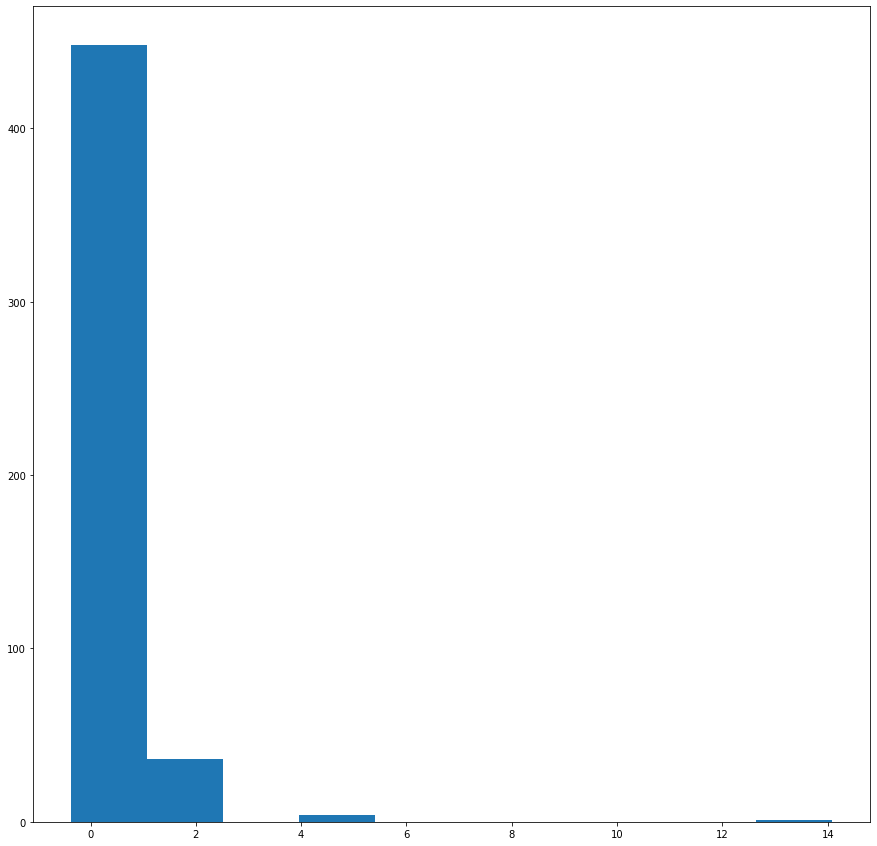

In [88]:
fig = plt.figure(figsize=(15,15))
plt.hist(coeffs_list)

(array([ 36.,  19.,  12.,  15.,  13.,  32.,  36.,  56., 107., 163.]),
 array([1.48683199e-05, 1.00013381e-01, 2.00011895e-01, 3.00010408e-01,
        4.00008921e-01, 5.00007434e-01, 6.00005947e-01, 7.00004460e-01,
        8.00002974e-01, 9.00001487e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

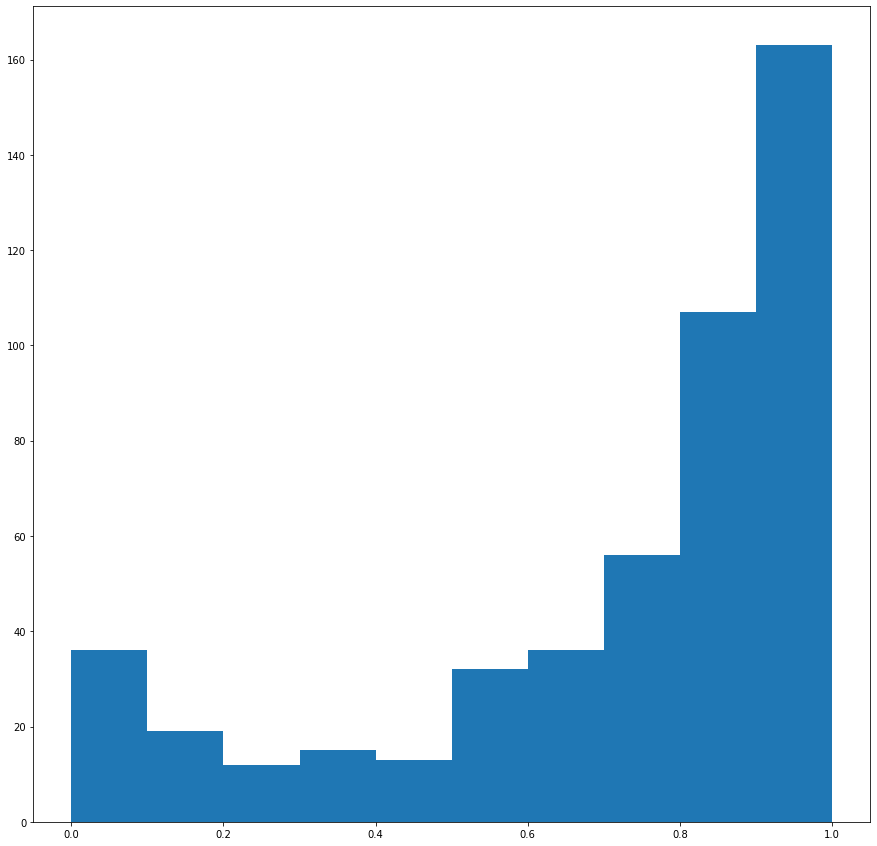

In [86]:
fig = plt.figure(figsize=(15,15))
plt.hist(scores_list)

(array([  1.,   0.,   0.,   1.,  13.,  75., 388.,   9.,   1.,   1.]),
 array([-906.5345161 , -762.88399037, -619.23346465, -475.58293892,
        -331.9324132 , -188.28188747,  -44.63136175,   99.01916398,
         242.6696897 ,  386.32021543,  529.97074115]),
 <BarContainer object of 10 artists>)

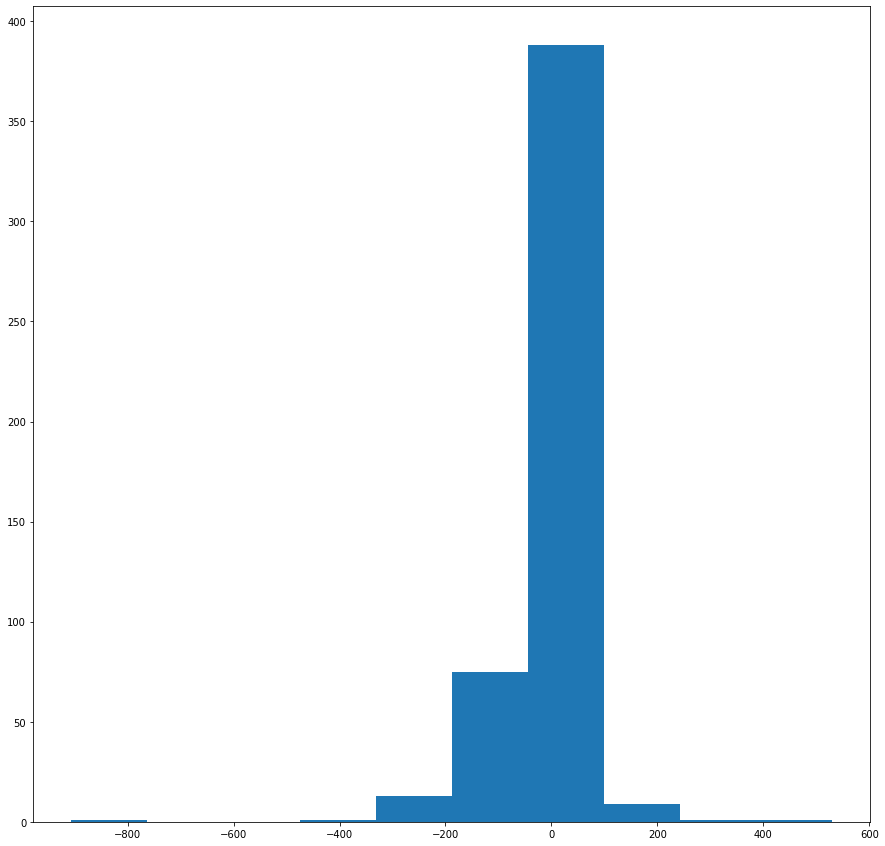

In [87]:
fig = plt.figure(figsize=(15,15))
plt.hist(intercepts_list)

# Finding SMB and HML returns